# Orbital Localization Theory

This notebook takes you through the methods implemented in nbed for orbital localization.
- SPADE
- Concentric Localization

In [1]:
import numpy as np
import os

## Background

The overlap matrix is:

$$S_{\mu \nu} =  \int d\vec{r}_{1} \phi_{\mu}(1)^{*}\phi_{\nu}(1)$$

- $\phi_{\mu}$ are basis functions (defined in basis set)


The unknown molecular orbitals $\psi_{i}$ are expanded as a linear expansion of the $K$ known basis functions $\{ \phi_{i} | i=1,2,..., K \}$:

$$ \psi_{i} =  \sum_{\mu=1}^{K} C_{\mu i} \phi_{\mu}$$


$C$ is a $K \times K$ matrix of expansion coefficients $C_{\mu i}$. The columns of $C$ describe the molecular orbitals!


We can find the total number of electrons $N$ in the system by:

$$ N =  2 \sum_{a}^{N/2}\int d\vec{r}  \bigg( \psi_{a}(\vec{r})^{*} \psi_{i}(\vec{r}) \bigg) =  2 \sum_{a}^{N/2} 1$$

- integral gives probablity of finding electron $a$ over all space (must be 1)
- summing over all electrons will give the total number of electrons

The charge density has the following definition:

$$\rho(\vec{r}) = 2 \sum_{a}^{N/2} \bigg( \psi_{a}(\vec{r})^{*} \psi_{i}(\vec{r}) \bigg)$$

- re-write using definition of $\psi_{i}=  \sum_{\mu=1}^{K} C_{\mu i} \phi_{\mu}$

$$\rho(\vec{r}) = 2 \sum_{a}^{N/2} \Bigg( \bigg[ \sum_{\nu}^{K} C_{\nu a}^{*} \phi_{\nu}(\vec{r})^{*} \bigg] \bigg[ \sum_{\mu}^{K} C_{\mu a}\phi_{\mu}(\vec{r}) \bigg] \Bigg)$$

- move things around

$$\rho(\vec{r}) = \sum_{\nu}^{K} \sum_{\mu}^{K} \Big( 2 \sum_{a}^{N/2} C_{\mu a} C_{\nu a}^{*} \Big) \phi_{\mu}(\vec{r}) \phi_{\nu}(\vec{r})^{*} $$

- which is 

$$\rho(\vec{r}) = \sum_{\mu, \nu}^{K} P_{\mu \nu} \phi_{\mu}(\vec{r}) \phi_{\nu}(\vec{r})^{*} $$


- $P_{\mu \nu}$ is known as the density matrix and is:

$$P_{\mu \nu} = 2 \sum_{a}^{N/2} C_{\mu a} C_{\nu a}^{*}$$

Therefore we can also find the total number of electrons in the system by:

$$ N =  2 \sum_{a}^{N/2}\int d\vec{r}  \bigg( \psi_{a}(\vec{r})^{*} \psi_{i}(\vec{r}) \bigg) =  \sum_{\nu}^{K} \sum_{\mu}^{K} \Big( 2 \sum_{a}^{N/2} C_{\mu a} C_{\nu a}^{*} \Big) \int d\vec{r} \phi_{\mu}(\vec{r})  \phi_{\nu}(\vec{r})^{*}$$

- This is simply:

$$N =  \sum_{\nu}^{K} \sum_{\mu}^{K} P_{\mu \nu} S_{\nu \mu}= \sum_{\mu}^{K} PS_{\mu \mu} = \mathcal{Tr}(PS)$$

- One can interpret $ PS_{\mu \mu}$ in the above equation as the number of electrons associated with $ \phi_{\mu}$
- This is a **Mulliken population analysis**

## Orbital Localization

- When we perform a SCF calculation, one gets an optimized C matrix
    - $C$ is a $K \times K$ matrix of expansion coefficients $C_{\mu i}$
    - The columns of $C$ describe the molecular orbitals!
    - MO i: $ \psi_{i} =  \sum_{\mu=1}^{K} C_{\mu i} \phi_{\mu}$
    
    
- These molecular orbitals are usually **delocalized**
    - non-negligible amplitude over the whole system, rather than only around some atom(s) or bond(s)

- But we know in QM that a given basis choice is NOT unique


- We can therefore perform a unitary rotation on molecular orbitals

$$ \psi_{i} U_{rot} =  \Big( \sum_{\mu=1}^{K} C_{\mu i} \phi_{\mu} \Big) U_{rot} = \psi_{i}^{new}$$
    
    
The idea is to use a rotation such that the resulting orbitals $\psi_{i}^{new}$ are as spatially localized as possible. 


The Pipek-Mezey (PM) [localization](https://notendur.hi.is/hj/papers/paperPipekmezey8.pdf) **maximizes the population charges on the atoms**:

$$ f (U_{rot}) = \sum_{A}^{N_{atoms}} \Bigg( Z_{A} -  \sum_{\mu \text{ on atom } A} PS_{\mu \mu} \Bigg)$$

### Method 1 - Population-based methods
- Given optimized $C$ coefficient matrix
    - which has been rotated to localize orbitals
    - (used to build localized density matrix)


- **Look through basis functions $\phi_{\mu}$ of the ACTIVE atoms**

    
- check the mulliken charge // mulliken population of the orbital
    - if above a certain threshold associate it to active system
    - otherwise put in the environment
 


To choose the active and enviroment subsystems we do the following:

1. Given a localized molecular orbs (localized C matrix), we take the absolute mag squared of the coefficients of the active part for a given localized orb and divide by the absolute mag squared of all the coefficents of a that orb... THis will give a value of how much the active system contributes to that orb.

2. Mathematically, for orbital $j$ 
    - remember MO orbs given by columns of C matrix
    - In equation below C matrix is the LOCALIZED form!


$$ \text{threshold} =  \frac{\sum_{\mu\in \text{active AO}}^{K} |C_{\mu j}|^{2}}{\sum_{\mu =1}^{K} |C_{\mu j}|^{2}}$$

### METHOD 2 - SPADE

    

Subsytem Projected Atomic orbital DEcomposition (SPADE) begins by orthogonalising the occupied MOs

$$ \bar{C}_{occ} = S^{-1/2}C_{occ}$$

We project these onto the active atomic orbitals (erasing the contribution from the environment AOs to the MO matrix).

$$ \bar{C}_{occ}^A = P_A\bar{C}_{occ}$$

A singlular value decomposition of these is then taken

$$ \bar{C}_{occ}^A = U \Sigma V^{T}$$

The singular values $\{\sigma\}$ given as the diagonal elements of $\Sigma$, are then used to define the subsytem decomposition by locating the maximum change in singluar value

$$ m = max_{i} \bigg(\sigma_{i} - \sigma_{i+1} \bigg)$$

The occupied MOs are then rotated into the SPADE basis using the right singular vectors of the SVD

$$ \bar{C}_{occ}^{SPADE} = \bar{C}_{occ} V_{m}$$

The SPADE basis is then used to define the active and environment subsystems, taking the first m orbitals as the active subsystem and the remaining as the environment.

Let's start by building a molucule and SCF object.

In [2]:
from pathlib import Path

water_filepath = Path("molecular_structures/formamide.xyz").absolute()
print(water_filepath)

basis = "STO-3G"
charge = 0
xc_functional = "b3lyp"
convergence = 1e-6
max_ram_memory = 4_000
n_active_atoms = 2
occ_cutoff = 0.95
virt_cutoff = 0.95
run_virtual_localization = False

/Users/michaelwilliamsdelabastida/Code/Nbed/docs/source/notebooks/molecular_structures/formamide.xyz


In [3]:
from pyscf import gto, scf

full_mol = gto.Mole(
    atom=str(water_filepath),
    basis=basis,
    charge=charge,
).build()

global_ks = scf.RKS(full_mol)
global_ks.conv_tol = convergence
global_ks.xc = xc_functional
global_ks.max_memory = max_ram_memory
global_ks.verbose = 1
global_ks.kernel()

/Users/michaelwilliamsdelabastida/Code/Nbed/.venv/lib/python3.13/site-packages/pyscf/dft/libxc.py:512: UserWarning: Since PySCF-2.3, B3LYP (and B3P86) are changed to the VWN-RPA variant, corresponding to the original definition by Stephens et al. (issue 1480) and the same as the B3LYP functional in Gaussian. To restore the VWN5 definition, you can put the setting "B3LYP_WITH_VWN5 = True" in pyscf_conf.py
  warnings.warn('Since PySCF-2.3, B3LYP (and B3P86) are changed to the VWN-RPA variant, '


np.float64(-167.59178321957404)

In [4]:
from scipy import linalg
import numpy as np

# Locate he occupied orbitals
occupancy = global_ks.mo_occ
n_occupied_orbitals = np.count_nonzero(occupancy)
occupied_orbitals = global_ks.mo_coeff[:, :n_occupied_orbitals]

# Project onto the active AOs
# Do this by erasing rows of the C matrix
# that correspond to contributions from the environment
# this only works because we have placed our active atoms at the start of the file.
n_act_aos = global_ks.mol.aoslice_by_atom()[n_active_atoms - 1][-1]

# Orthogonalise the MOs
ao_overlap = global_ks.get_ovlp()

rotated_orbitals = linalg.fractional_matrix_power(ao_overlap, 0.5) @ occupied_orbitals

# Take the SVD of the rotated and projected orbitals
_, sigma, right_vectors = linalg.svd(rotated_orbitals[:n_act_aos, :])


# Prevents an error with argmax
if len(sigma) == 1:
    n_act_mos = 1
else:
    value_diffs = sigma[:-1] - sigma[1:]
    n_act_mos = np.argmax(value_diffs) + 1

n_env_mos = n_occupied_orbitals - n_act_mos

# get active and enviro indices
active_MO_inds = np.arange(n_act_mos)
enviro_MO_inds = np.arange(n_act_mos, n_act_mos + n_env_mos)

# Defining active and environment orbitals and density
c_active = occupied_orbitals @ right_vectors.T[:, :n_act_mos]
c_enviro = occupied_orbitals @ right_vectors.T[:, n_act_mos:]
c_loc_occ = occupied_orbitals @ right_vectors.T

In [5]:
enviro_MO_inds

array([ 9, 10, 11])

In [6]:
print(f"{n_act_mos=}")
print(f"{n_env_mos=}")

print(f"{active_MO_inds=}")
print(f"{enviro_MO_inds=}")

print(f"{c_active.shape=}")
print(f"{c_enviro.shape=}")

n_act_mos=np.int64(9)
n_env_mos=np.int64(3)
active_MO_inds=array([0, 1, 2, 3, 4, 5, 6, 7, 8])
enviro_MO_inds=array([ 9, 10, 11])
c_active.shape=(18, 9)
c_enviro.shape=(18, 3)


# Virtual Orbital Localization

We may also wish to localize unoccupied (virtual) orbitals to the active region or environment. The benefit of this is that we can have a smaller Hamiltonian, saving time and memory for classical algorithms or qubit count and circuit depth in the case of quantum algorithms.

Below we show two methods for doing this which are available in Nbed:
1. Concentric Localization      ("cl")
2. Projected Atomic Orbitals    ("pao")

Their usage in `nbed` is very straightforward, simply include the field `virtual_localizer` in your config with your selection. [See the options in nbed's documntation.](https://nbed.readthedocs.io/en/latest/config.html#module-nbed.config)

## Concentric Localization

[1] D. Claudino and N. J. Mayhall, "Simple and Efficient Truncation of Virtual Spaces in Embedded Wave Functions via Concentric Localization", Journal of Chemical Theory and Computation, vol. 15, no. 11, pp. 6085-6096, Nov. 2019, doi: 10.1021/ACS.JCTC.9B00682.

Concentric localization is an extension of SPADE which allows for virtual orbitals to be localized. 

This procedure is carried out after projection based embedding is complete, as this allows for selection of virtual orbitals which are most suitable for the embedded system. Virtual orbital selection does not impact the projection based embedding procedure, until the calculation of the embedded energy term.

Beginning with the occupied orbitals of the active region, the procedure is carried out iteratively.In the first iteration, the procedure allows for a change of basis from embedding to Concentric Localization. The virtual orbitals which overlap to the greatest extent with the occupied orbitals of the active region are selected. These are then used to define the first shell of the Concentric Localization basis. Further iterations find the overlap of remaining virtual MOs with all previous shells (including occupied MOs), under the action of the fock operator. The virtual MOs which interact with the active region are then used to define the next shell of the Concentric Localization basis.


### Theory
We begin by projecting the MOs onto the active region.

$$ \bar{C}^A = P_A\bar{C}$$

The first step of the iterative process requires finding the virtual orbitals in the projected basis. Note that these virtual orbitals should not include those which have been projected out of the active space.

$$ C^A_{vir} = S^{-1}_A S_{PB,WB} C_{vir} $$

Where $S_{PB,WB}$ gives the overlap matrix between the projected basis and the `working basis` (the basis set used in the projection procedure with occupied environment orbitals removed).

$$ [S_{PB,WB}]_{i,j} = \langle a_i | u_j \rangle \ \{a_i \in C^A, u_j \in C\}$$

We can then begin to build up a set of localized orbitals iteratively. For the initial step, we find the overlap of the two sets of orbitals and singlular value decompose this.

$$ C^A_{vir} S_{PB,WB} C_{vir} = U \Sigma V^{T}$$

By splitting the $V$ matrix into its span and kernel, we can define two sets of orbitals for the $1st$ shell.

Let $T: V \to W$ we a linear transformation, then the image and kernel of $T$ are defined as

$$ im\ T = T(V) = \{T(v) | v \in V\}$$
$$ ker\ T = \{v \in V | T(v) = 0\}$$

The span and kernel can be found by taking the singular value decomposition of $T = L\Sigma R$.

$$ C_{span} = \{r_i \in R | \Sigma_i \neq 0\}$$
$$ C_{ker} = \{r_i \in R | \Sigma_i = 0\}$$

Finally, we can define the two sets of orbitals for the $1st$ shell.

$$ C_0 = C_{vir} V_{span}$$
$$ C_{0,k} = C_{vir} V_{ker}$$

Subesquent iterations are found using the overlap of these two sets of orbitals under the action of the Fock operator $F$.

$$ C_n^{\dagger} F C_{n,k} = U_n \Sigma_n V_n^{T}$$

$$ C_{n+1} = C_{n,k} V_{n,span}$$
$$ C_{n+1,k} = C_{n,k} V_{n,ker}$$

Note the code associated with the original paper `PsiEmbed` defines the span matrix slighly differently.
$$ C_{n+1} = \{C_0|...|C_{n-1}|C_{n,k} V_{n,span}\}$$

(From experience it seems that this choice ensures all orbitals will be included.)

Ultimately, the active space is constructed from the occupied orbitals of the active region and the first $n$ shells.

$$ C_{active\ space} \to \{C_{act, occ}|C_0| C_1| \dots| C_{n}\}

>NOTE
>
>This section will be added at the end of the driver method. So to work it out we'll run the driver first.

### Relative accuracy of the embedding energy

By using concentric localization, we can reduce the number of virtual molecular orbitals which need to be included in a calculation. 

To see this, lets compare the embedded energy calculation we get by truncating the virtual spaces we get with and without concentric localization.

First we'll get the full system CCSD, including the environment occupied orbitals.

In [7]:
from nbed import nbed
from pyscf.cc import CCSD
from pathlib import Path
import numpy as np
mol_filepath = Path("molecular_structures/formamide.xyz").absolute()
    
cl_driver = nbed(
    geometry=mol_filepath,
    n_active_atoms=2,
    basis="6-31g",
    xc_functional="b3lyp",
    projector="mu",
    localization="spade",
    convergence=1e-6,
    charge=0,
    spin=0,
    mu_level_shift=1e6,
    max_shells=10,
    run_ccsd_emb = True
)


global_cc = CCSD(cl_driver._global_hf)
global_cc.verbose = 1
global_cc.run()
global_cc = global_cc.e_tot

Now let's get the embedded CCSD-in-DFT energy, varying the size of the virtual space.

In [8]:
from nbed import nbed
from pyscf.cc import CCSD
from pathlib import Path
import numpy as np

def get_partial_cc_errors(virtual_localization: str):
    mol_filepath = Path("molecular_structures/formamide.xyz").absolute()

    driver = nbed(
        geometry=mol_filepath,
        n_active_atoms=2,
        basis="6-31g",
        xc_functional="b3lyp",
        projector="mu",
        localization="spade",
        virtual_localization=virtual_localization,
        convergence=1e-6,
        charge=0,
        spin=0,
        mu_level_shift=1e6,
        max_shells=10,
        run_ccsd_emb = True
    )

    def embedding_correction(val, driver):
        return val + driver.e_env + driver.two_e_cross - driver.mu["correction"] - driver.mu["beta_correction"]

    full_cc = driver.mu["e_ccsd"]

    partial_scf = driver.embedded_scf.copy()
    energies = []
    mos = [i for i in range(5, 34)]
    mos = mos[::-1]
    for i in mos:
        partial_scf.mo_coeff = partial_scf.mo_coeff[:,:, :i]
        partial_scf.mo_occ = partial_scf.mo_occ[:,:i]

        e_ccsd = CCSD(partial_scf)
        e_ccsd.verbose = 1
        e_ccsd.run()
        driver_ccsd = e_ccsd.e_tot
        driver_ccsd = embedding_correction(driver_ccsd, driver)
        energies.append(driver_ccsd - full_cc)
    return full_cc, energies

The default is for nbed to use Concentric Localization, as this retains the whole virtual space, but we can disable virtual localization with a flag.

In [9]:
unlocalized = get_partial_cc_errors(virtual_localization="disable")
localized = get_partial_cc_errors(virtual_localization="cl")

We can see that the total energy between methods is very similar so our CL procedure does not introduce energy errors.

In [10]:
print("Unlocalized CCSD:", unlocalized[0])
print("Diff of complete virtual space energies:", unlocalized[0] - localized[0])

Unlocalized CCSD: -169.48051043912199
Diff of complete virtual space energies: -2.5353074306622148e-08


There is naturally a difference between using global coupled cluster and cc-in-dft embedding.

This arises out of using DFT for the environment occupied orbitals in our "embedded" calculations, and CCSD for them in our "global ccsd" calculation.

In [11]:
global_cc - unlocalized[0]

np.float64(0.2879207906178749)

It is important to remember what we are comparing, we're interested in reducing the number of molecular orbitals needed to accurately find the energy of the **embedded region**.

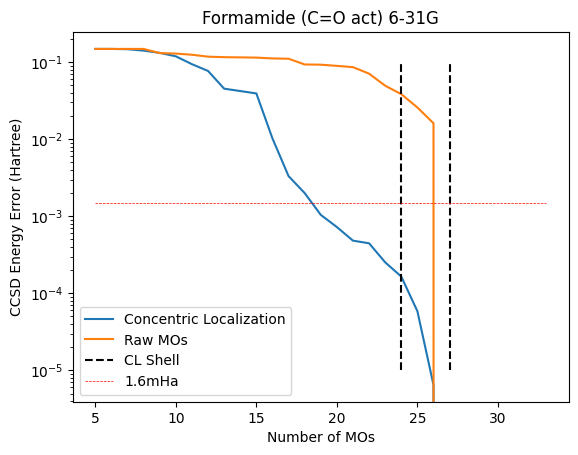

In [12]:
from matplotlib import pyplot as plt

plt.semilogy(np.arange(5, 33), np.abs(localized[1][::-1][:-1]))
plt.semilogy(np.arange(5, 33), np.abs(unlocalized[1][::-1][:-1]))
plt.vlines(cl_driver.mu["cl"].shells[0], ymin=1e-5, ymax=1e-1, color="k", linestyle="--")
plt.hlines(1.5e-3, xmin=5, xmax=33, color="red", linestyle="--", linewidth=0.5)

plt.title("Formamide (C=O act) 6-31G")
plt.ylabel("CCSD Energy Error (Hartree)")
plt.xlabel("Number of MOs")
plt.legend(["Concentric Localization", "Raw MOs", "CL Shell", "1.6mHa"])

Great! Concentric localization has reduced the number of virtual MOs we need to include to reach chemical accuracy (of the embedded calculation!)

## Projected Atomic Orbitals

[2] Szirmai, Ádám B., et al. "Projected atomic orbitals as optimal virtual space for excited state projection-based embedding calculations." Journal of Chemical Theory and Computation 20.9 (2024): 3420-3425.



Whereas Concentric Localization gives a procedure to iteratively localize the entire virtual space, the Projected Atomic Orbitals method includes the use of cutoff parameters to reduce the size of the virtual space. 

### Theory

Define the projector of the occupied orbitals

$$R = C_{occ}C^{T}_{occ}$$

From which we get the Projected Atomic Orbital C-matrix

$$C_{PAO} = \mathbb{1} - RS$$

(Where S is the AO overlap matrix)

We project these orbitals into the basis of the active subsystem

$$ \bar{C}_{pao}^A = P_A\bar{C}_{pao}$$

We can then truncate the size of the virtual space by setting a cutoff in the norm of the overlap between 

$$ N_i = \sum_{\mu}^{act AOs} (C_{PAO})_{i\mu}  (SC_{PAO})_{i\mu}$$

The remaining orbitals are renormalized forming ${C'}_{PAO}$

Finally, a second trunction step is used. By first diagonalising the overlap matrix 

$$S_{PAO} = ({C'}_{PAO})^{T}S {C'}_{PAO}$$

we restrict to only the orbitals with an eighenvalue above some parameter.


### Cutoffs

In the supplementary material to the paper above, they suggest using 

- Norm Cutoff : 0.05
- Overlap Cutoff : 1e-5

so these are the default values nbed uses.

In [13]:
mol_filepath = Path("molecular_structures/formamide.xyz").absolute()

pao_driver = nbed(
    geometry=mol_filepath,
    n_active_atoms=2,
    basis="6-31g",
    xc_functional="b3lyp",
    projector="mu",
    localization="spade",
    virtual_localization="pao",
    convergence=1e-6,
    charge=0,
    spin=0,
    mu_level_shift=1e6,
    run_ccsd_emb = True,
    norm_cutoff=0.05,
    overlap_cutoff=1e-5,
)
print("Number of Molecular Orbitals:", pao_driver.mu["scf"].mo_coeff.shape[-1]+1) #zero-indexing!
print("Embedded CCSD Energy:", pao_driver.mu["e_ccsd"])
print("Error from complete virtual space:", pao_driver.mu["e_ccsd"] - unlocalized[0])

Number of Molecular Orbitals: 27
Embedded CCSD Energy: -169.35216765732525
Error from complete virtual space: 0.1283427817967322


Let's see how the value from PAO compares to the results from Concentric Localization we looked at above.

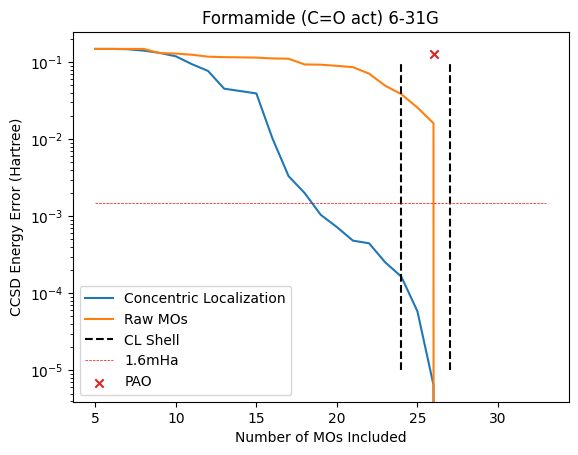

In [14]:
from matplotlib import pyplot as plt

plt.semilogy(np.arange(5, 33), np.abs(localized[1][::-1][:-1]))
plt.semilogy(np.arange(5, 33), np.abs(unlocalized[1][::-1][:-1]))
plt.vlines(cl_driver.mu["cl"].shells[0], ymin=1e-5, ymax=1e-1, color="k", linestyle="--")
plt.hlines(1.5e-3, xmin=5, xmax=33, color="red", linestyle="--", linewidth=0.5)
plt.scatter(x=[pao_driver.mu["scf"].mo_coeff.shape[-1]], y=[pao_driver.mu["e_ccsd"]-unlocalized[0]], marker="x", color="tab:red")

plt.title("Formamide (C=O act) 6-31G")
plt.ylabel("CCSD Energy Error (Hartree)")
plt.xlabel("Number of MOs Included")
plt.legend(["Concentric Localization", "Raw MOs", "CL Shell", "1.6mHa", "PAO"])